In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
# Loads saved model
model = load_model('multiple_input_multiple_datasets_model.h5')

In [3]:
# csv file path of dataset testing model on. Top of dataset is most recent stock prices
dataset_filename_to_read = 'GOOGL_daily.csv'
data = pd.read_csv(dataset_filename_to_read)
data = data.iloc[::-1]
data = data.drop('date', axis=1)
print(data.head())
print(data.shape)
print(type(data))

      1. open  2. high  3. low  4. close   5. volume
4049   100.01   104.06   95.96   100.335  44659000.0
4048   101.01   109.08  100.50   108.310  22834300.0
4047   110.76   113.48  109.05   109.400  18256100.0
4046   111.24   111.60  103.57   104.870  15247300.0
4045   104.76   108.00  103.88   106.000   9188600.0
(4050, 5)
<class 'pandas.core.frame.DataFrame'>


In [4]:
data = data.values
print(type(data))

<class 'numpy.ndarray'>


In [32]:
most_recent_open_values = data[-10:,0]
print(most_recent_open_values)

[1609.     1525.     1548.9    1550.18   1528.15   1531.6471 1527.89
 1542.48   1485.81   1488.3   ]


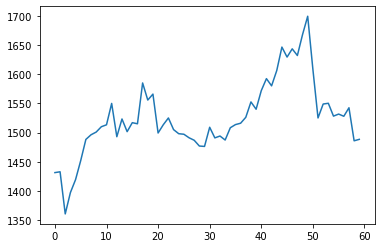

In [41]:
plt.plot(data[-60:,0])

In [34]:
normalizing_scaler = preprocessing.MinMaxScaler()
normalized_data = normalizing_scaler.fit_transform(data)
print("Normalized data")
print(normalized_data[-5:-1,:])
print(normalized_data.shape)

Normalized data
[[0.89510763 0.89589625 0.90085857 0.87105071 0.02550823]
 [0.89276007 0.89219633 0.91172014 0.8873054  0.01356181]
 [0.90187637 0.89427715 0.90500118 0.87306632 0.01301517]
 [0.86646714 0.85998061 0.87359276 0.85757831 0.02389275]]
(4050, 5)


In [35]:
# Get y_normalizer
# Get unscaled stock open price from original file data
next_day_open_values = np.array([data[:,0][i + 30].copy() for i in range(len(data) - 30)])
next_day_open_values = np.expand_dims(next_day_open_values, -1)
print("Next day open values unscaled:", next_day_open_values.shape)

y_normaliser = preprocessing.MinMaxScaler()
y_normaliser.fit(next_day_open_values)

Next day open values unscaled: (4020, 1)


MinMaxScaler()

In [36]:
# ohlcv_one is first 50 readings (days) of open/high/low/close/volume values
ohlcv_one = normalized_data[-30:]
#ohlcv_one = np.array([ohlcv_one])
print(ohlcv_one.shape)
print(ohlcv_one[0][0])

ohlcv_two = normalized_data[-60:-30]
#ohlcv_two = np.array([ohlcv_two])

(30, 5)
0.880981986091238


In [37]:
mov_avg_one = np.mean(ohlcv_one[:,3]) # closing price average, so average closing price from first 50 days
print(type(mov_avg_one))
print(mov_avg_one)

mov_avg_two = np.mean(ohlcv_two[:,3])

<class 'numpy.float64'>
0.9005306936733071


In [38]:
def test_model(ohlcvItem, movAvgItem):
    normalized_price_today = ohlcvItem[0][0]
    normalized_price_today = np.array([[normalized_price_today]])
    price_today = y_normaliser.inverse_transform(normalized_price_today)
    
    ohlcvItem = np.array([ohlcvItem])
    movAvgItem = np.array([movAvgItem])
    print(ohlcvItem.shape)
    print(movAvgItem.shape)

    predicted_price_tomorrow = np.squeeze(y_normaliser.inverse_transform(model.predict([ohlcvItem, movAvgItem])))
    print("Actual price: ", price_today)
    print("Predicted price: ", predicted_price_tomorrow)

In [39]:
test_model(ohlcv_one, mov_avg_one)

(1, 30, 5)
(1,)
Actual price:  [[1512.81406122]]
Predicted price:  1462.555


In [40]:
test_model(ohlcv_two, mov_avg_two)

(1, 30, 5)
(1,)
Actual price:  [[1436.53594197]]
Predicted price:  1491.3722
